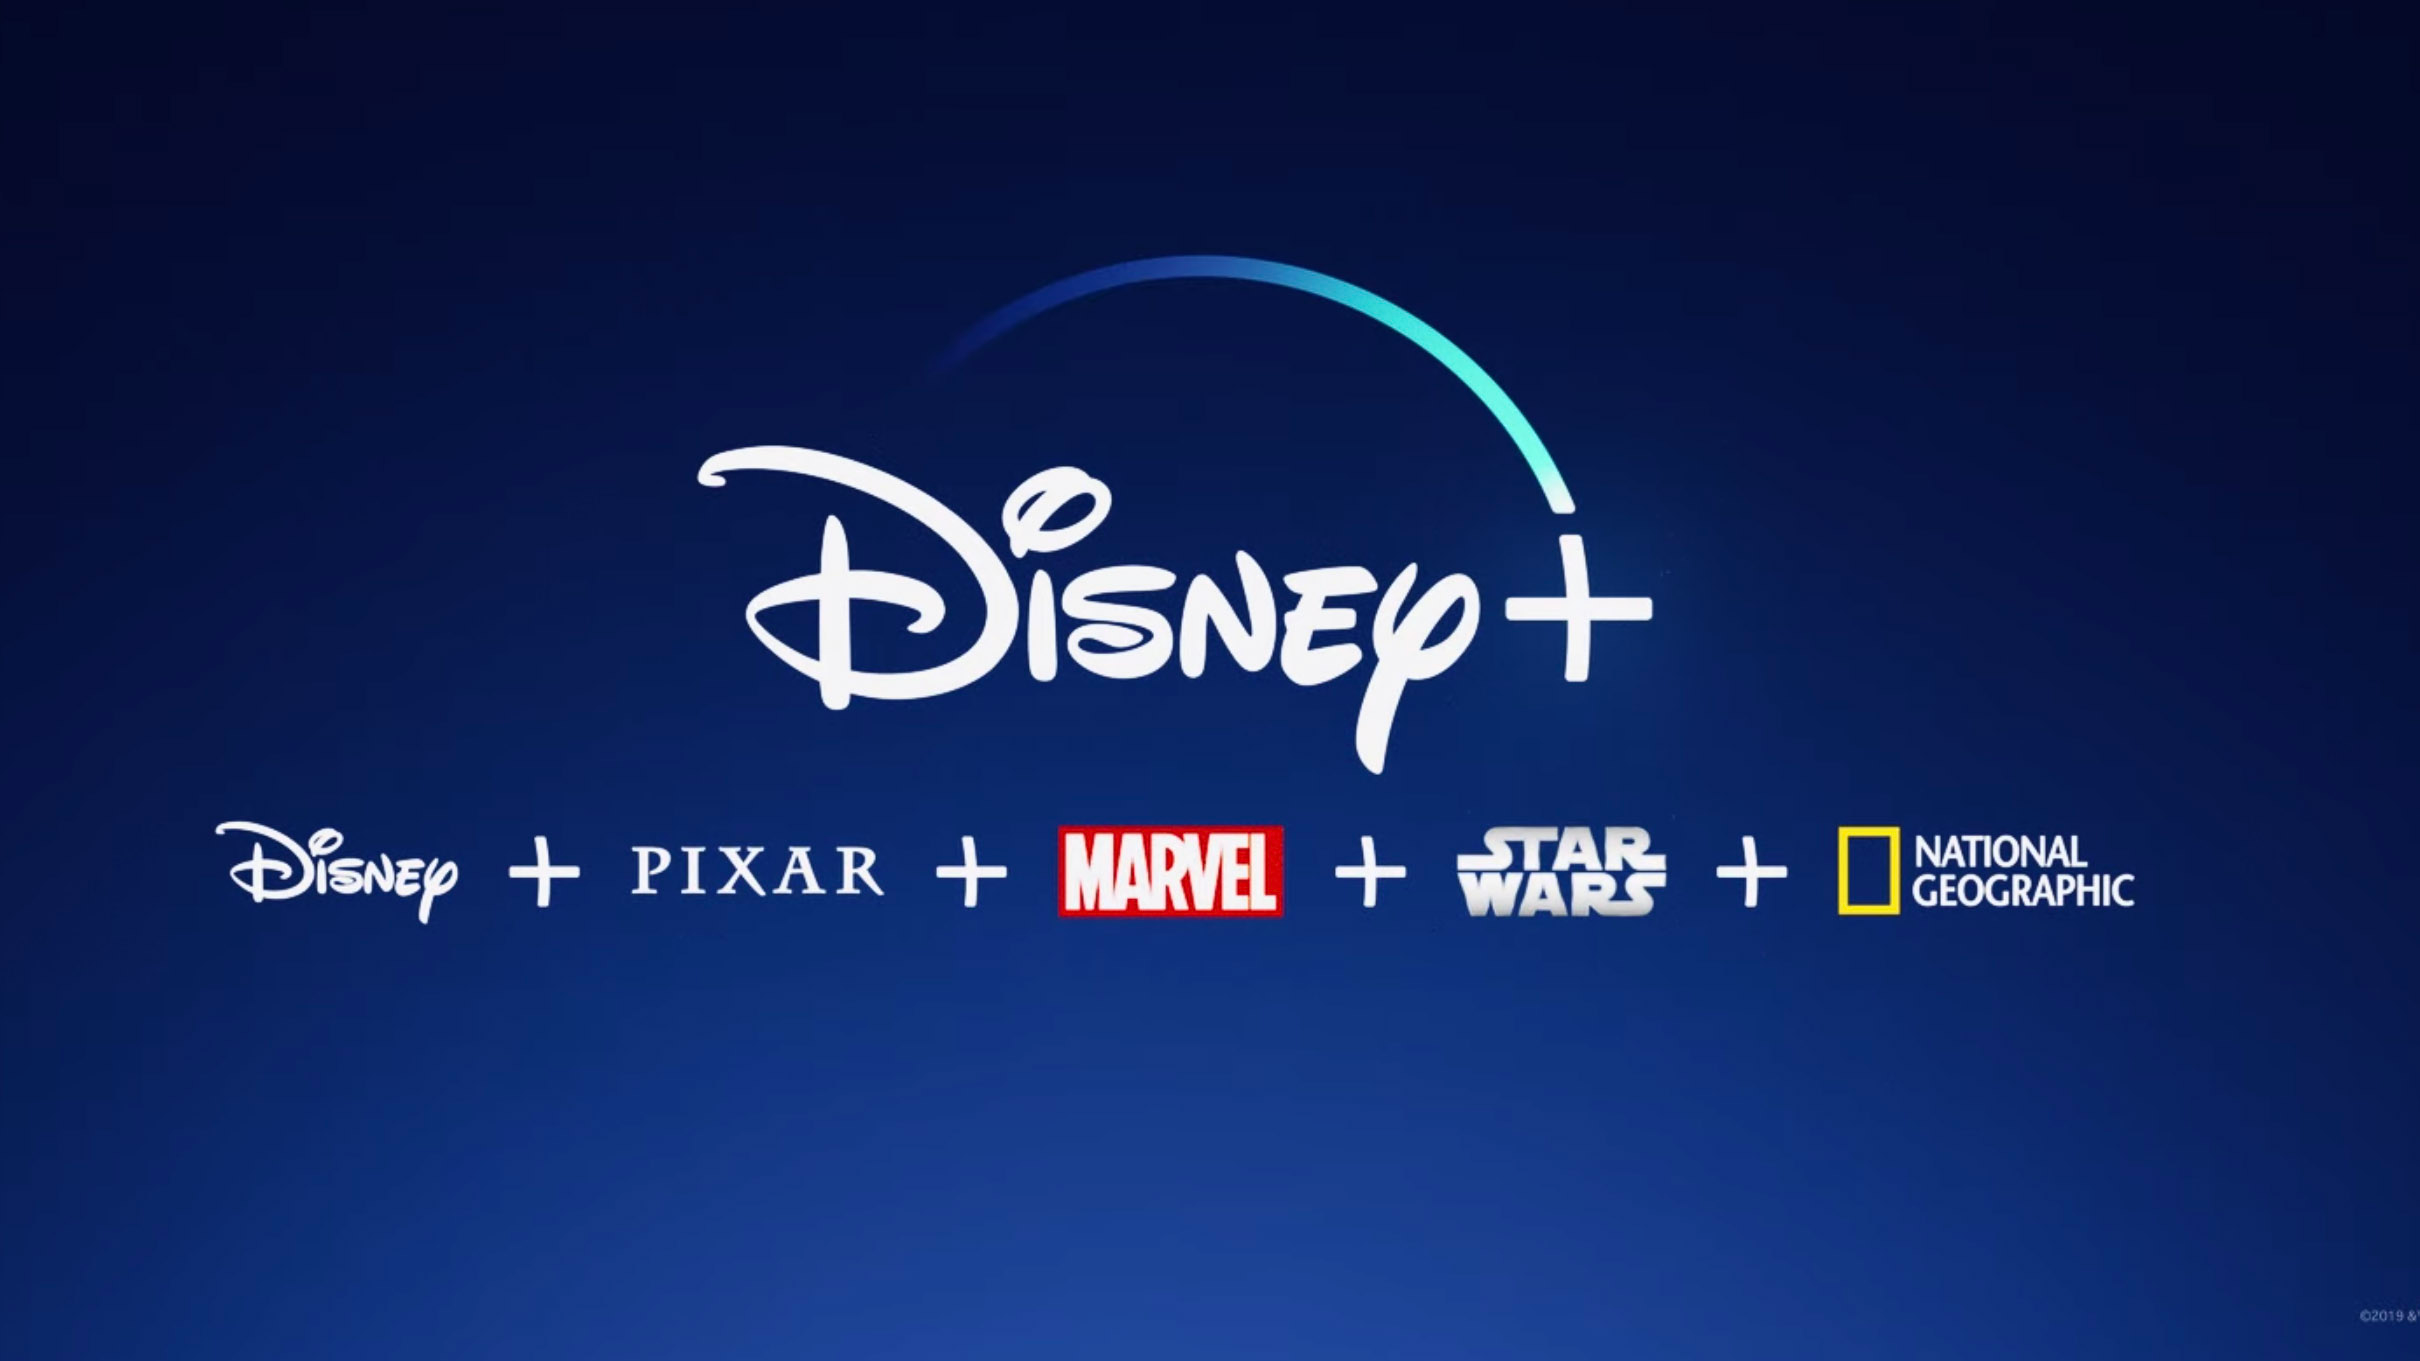

# Welcome to Disney Plus!

Disney+ is an American subscription video on-demand over-the-top streaming service owned and operated by the Media and Entertainment Distribution division of The Walt Disney Company.

Given the large number of movies and series available on the platform, it is a perfect opportunity to see trends within this streaming service. Let us take a first crack at a CSV file containing Disney Plus data.

Data used courtesy of kaggle.com.

# An analysis of streaming content on Disney +

An up and coming entertainment studio would like to include a new sci fi series called "Space Pens" on this platform.
This is a ten episode animated series for kids.
With the help of the analysis, we will be able to see trends and be able to present
solutions in order to maximize success for this entertainment studio's series.

## I. Ask

### What is the problem that needs to be solved?

To find out how to maximize viewership and profit for the new series, we need to observe trends on the current content on Disney +.

### How can insights drive business decisions?

This will be done with the help of visualizations and key findings from the data.  With the assistance of 
key findings and data visualizations, recomendations will be made in order to maximize viewership for "Space Pens".


## II. Prepare
We will use the dataset supplied for a period of two years (2019 - 2020).  The dataset was downloaded from kaggle.com under the appropriate license ensuring credibility of the data.  This is also public data anyone can use to explore content on Disney +.
The dataset was downloaded as a csv file and stored securely in a single folder for easy access.

## III. Process
Programming language Python will be used for key data findings and visualizations.
Prior to including csv dataset into the notebook, data will be cleaned on Microsoft Excel.
For work in Python, Jupyter Notebook will be used for data cleaning and visualizations.

First step will have the process of importing libraries into this project.
These important libraries include:
-  Pandas – allowing import of data from various file formats such as comma-separated values (csv).  Pandas also allows various data manipulation, which include merging, reshaping, selecting, cleaning and data wrangling.
-  Numpy – this is used for various mathematical operations to be used on arrays in the data.
-  Matplotlib and Seaborn – this is used for visualization analysis of the data.
-  Worldcloud - this will provide the most common words used on tv series.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Read in the CSV as a DataFrame
df = pd.read_csv('D://Files/Spreadsheets/disney_plus_shows_A.csv')

# Print the first five rows of the DataFrame
print(df.head(5))

     imdb_id                                       title  \
0  tt0147800                  10 Things I Hate About You   
1  tt7019028                        101 Dalmatian Street   
2  tt0115433                              101 Dalmatians   
3  tt0324941  101 Dalmatians 2: Patch's London Adventure   
4  tt0211181                              102 Dalmatians   

                                                plot    type  rated  year  \
0  A pretty, popular teenager can't go out on a d...   movie  PG-13  1999   
1  This series follows the lives of Delilah and D...  series    NaN  2018   
2  An evil high-fashion designer plots to steal D...   movie      G  1996   
3  Being one of 101 takes its toll on Patch, who ...   movie      G  2002   
4  Cruella DeVil gets out of prison and goes afte...   movie      G  2000   

  released_at           added_at  runtime  \
0  31/03/1999  November 12, 2019   97 min   
1  25/03/2019  February 28, 2020      NaN   
2  27/11/1996  November 12, 2019  103 min

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rated        742 non-null    object 
 5   year         894 non-null    object 
 6   released_at  894 non-null    object 
 7   added_at     894 non-null    object 
 8   runtime      838 non-null    object 
 9   genre        885 non-null    object 
 10  director     689 non-null    object 
 11  writer       743 non-null    object 
 12  actors       870 non-null    object 
 13  language     865 non-null    object 
 14  country      869 non-null    object 
 15  awards       556 non-null    object 
 16  metascore    292 non-null    float64
 17  imdb_rating  879 non-null    float64
 18  imdb_votes   879 non-null    object 
dtypes: float

## IV. Analysis
We will now organize, aggregate and format the data.  In this section, we will perform some calculations and gain some insights on trends in the data.

The following are some observed analysis outcomes.


In [4]:
# Check titles of Movies and TV shows

df.title.value_counts()

Freaky Friday                                                3
Kim Possible                                                 2
The Prince and the Pauper                                    2
DuckTales                                                    2
Hercules                                                     2
                                                            ..
High School Musical 2                                        1
High School Musical 3                                        1
High School Musical: The Musical - The Series                1
High School Musical: The Musical: The Series: The Special    1
Zootopia                                                     1
Name: title, Length: 872, dtype: int64

In [5]:
# Ratio of Movies, ratio of TV Shows

df.type.value_counts()/len(df)*100

movie      76.062640
series     21.364653
episode     2.572707
Name: type, dtype: float64

Based on the results.  76 % make up movies, 21 % make up series.

## A breakdown and plot of ratings

In [6]:
# A breakdown of ratings

df.rated.value_counts()/len(df)*100

G            23.154362
PG           17.337808
TV-G         14.765101
Approved      5.816555
TV-PG         4.586130
TV-Y7         4.586130
PG-13         4.138702
TV-Y          3.803132
Not Rated     1.789709
APPROVED      0.894855
TV-14         0.447427
Passed        0.447427
TV-Y7-FV      0.335570
UNRATED       0.335570
Unrated       0.223714
PASSED        0.223714
NOT RATED     0.111857
Name: rated, dtype: float64

Text(0.5, 1.0, 'Ratings Breakdown')

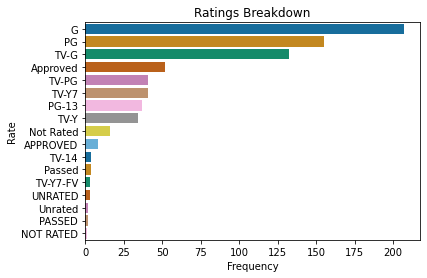

In [7]:
# Plot on Ratings

ax = sns.countplot(y = df.rated, palette = 'colorblind', order = df.rated.value_counts().index)
ax.set(xlabel = 'Frequency', ylabel= 'Rate')
plt.title("Ratings Breakdown")

Based on results, the majority of the content is rated G.

In [8]:
# A breakdown of genres

df.genre.value_counts()/len(df)*100

Documentary                                             5.928412
Comedy, Family                                          3.020134
Comedy, Drama, Family                                   2.125280
Action, Adventure, Sci-Fi                               1.901566
Animation, Short, Comedy, Family                        1.901566
                                                          ...   
Comedy, Drama, Family, Romance, Sport                   0.111857
Family, Adventure, Comedy, Drama                        0.111857
Family, Drama, Western                                  0.111857
Action, Adventure, Comedy                               0.111857
Animation, Adventure, Comedy, Crime, Family, Mystery    0.111857
Name: genre, Length: 366, dtype: float64

In [9]:
# Filter only Series

df = df[(df.type == "series")]

In [10]:
# A description of plot for each series

df['plot']

1      This series follows the lives of Delilah and D...
25     Viewers from around America send in home video...
27     Series exploring the incredible wildlife of Am...
30     A contemporary coming-of-age story about a gir...
38     Following the lives of Austin, an aspiring con...
                             ...                        
877    The Russo family may be an ordinary family wit...
879    After an explosion at the school, the X-Men we...
880    Nat Geo WILD celebrates pawsome dogs with its ...
882    This rendition of X-Men features Cyclops, Jean...
883    An in depth look into what our future will loo...
Name: plot, Length: 191, dtype: object

## Taking a look at the most common words in TV shows

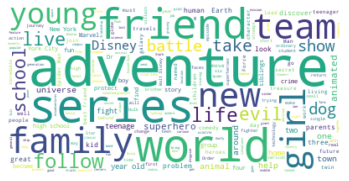

In [11]:
# combine multiple rows into one object
text = df['plot'].str.cat(sep='/ ')

# Create stopword list:
stopwords = set(STOPWORDS)

# Create and generate a word cloud image:
wc= WordCloud(stopwords = stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the results, most common words on TV shows are "adventure", "friend", "world" and "family"

In [12]:
# Breaking down Titles by release year

df.released_at.value_counts()/len(df)*100

12/11/2019    4.712042
01/01/2006    1.047120
12/09/1981    1.047120
01/01/2008    1.047120
01/04/2012    1.047120
                ...   
13/10/2019    0.523560
01/05/2018    0.523560
12/08/2017    0.523560
22/07/2016    0.523560
15/05/2017    0.523560
Name: released_at, Length: 173, dtype: float64

## Let us check the ratings for the series

In [13]:
# A breakdown of ratings

df.rated.value_counts()/len(df)*100

TV-G        20.942408
TV-Y7       19.895288
TV-Y        17.801047
TV-PG        8.900524
TV-14        1.570681
G            0.523560
TV-Y7-FV     0.523560
Name: rated, dtype: float64

In [14]:
#create a df that split the ratings column
df_rated = df.assign(var1 = df.rated.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_rated['var1'] = df_rated.var1.str.lstrip()

## V. Share
We will use Python libraries Seaborn and Matplotlib for data visualization.

## Let us check the most common duration of the series

In [15]:
#create a df that split the runtime column
df_runtime = df.assign(var1 = df.runtime.str.split(',')).explode('var1').reset_index(drop = True)

#To remove white space at the beginning of string:
df_runtime['var1'] = df_runtime.var1.str.lstrip()

Text(0, 0.5, '')

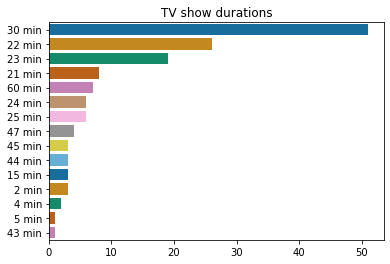

In [16]:
#plot top 15 durations

sns.countplot(y = df_runtime.var1, order=df_runtime.var1.value_counts().iloc[:15].index, palette = 'colorblind')
plt.title('TV show durations')
plt.xlabel('')
plt.ylabel('')

Based on the plot, most TV shows last at least 30 minutes

## Let us check out the breakdown of content by the original release year

In [17]:
# tranform in date
df['released']= df.released_at.astype('datetime64') 

# get only the year
df['released_year'] = df.released.dt.year

# get only the month
df['released_month'] = df.released.dt.month

Text(0.5, 0, 'Year')

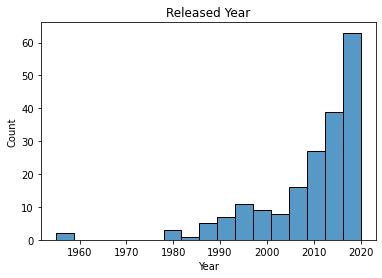

In [18]:
## plot a histogram

sns.histplot(df.released_year)
plt.title('Released Year')
plt.xlabel("Year")

Text(0, 0.5, 'Month')

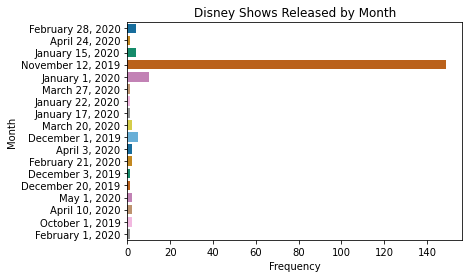

In [19]:
# plot released_month

sns.countplot(y = df.added_at, palette = 'colorblind')
plt.title('Disney Shows Released by Month')
plt.xlabel('Frequency')
plt.ylabel('Month')

Most of the content has been released within the last 20 years and most shows have been released in the month of November.

## Let us check on trends when content was added on the platform

In [20]:
# tranform in date

df['added'] = df.added_at.astype('datetime64')

# get only the year
df['added_year'] = df.added.dt.year
df['added_month'] = df.added.dt.month

In [21]:
# Here is a percentage breakdown

df.added_year.value_counts()/len(df) * 100

2019    82.722513
2020    17.277487
Name: added_year, dtype: float64

2019 (82 %), 2020 (17 %)

In [22]:
# Here is a breakdown by month

df.added_month.value_counts()/len(df)*100

11    78.010471
1      8.376963
2      3.664921
12     3.664921
4      2.617801
3      1.570681
5      1.047120
10     1.047120
Name: added_month, dtype: float64

Text(0, 0.5, 'Month')

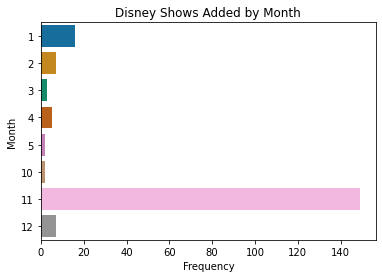

In [23]:
# plot added_month

sns.countplot(y = df.added_month, palette = 'colorblind')
plt.title('Disney Shows Added by Month')
plt.xlabel('Frequency')
plt.ylabel('Month')

Majority of content released in November

## Let us check runtime for content available on the platform

In [24]:
# First, convert to a float

df['runtime'] = df.runtime.str.rstrip('min')
df['runtime'] = df.runtime.str.rstrip('h').astype(float)

In [25]:
df.runtime.describe()

count    154.000000
mean      28.168831
std       13.286095
min        1.000000
25%       22.000000
50%       25.000000
75%       30.000000
max      110.000000
Name: runtime, dtype: float64

The mean runtime is around 68 minutes for each content on the platform

## A look at the awards and critics' scores

In [26]:
# First, awards

df.awards.value_counts()/len(df)*100

1 nomination.                                                         5.759162
2 nominations.                                                        2.617801
4 nominations.                                                        2.094241
1 win.                                                                2.094241
1 win & 3 nominations.                                                1.570681
                                                                        ...   
3 wins & 1 nomination.                                                0.523560
8 wins & 1 nomination.                                                0.523560
Nominated for 4 Primetime Emmys. Another 20 wins & 24 nominations.    0.523560
2 wins & 3 nominations.                                               0.523560
Won 2 Primetime Emmys. Another 35 wins & 50 nominations.              0.523560
Name: awards, Length: 84, dtype: float64

In [27]:
# A look at ratings from IMDB

df.imdb_rating.describe()

count    185.000000
mean       6.914595
std        1.044683
min        3.500000
25%        6.200000
50%        6.800000
75%        7.600000
max        9.700000
Name: imdb_rating, dtype: float64

<AxesSubplot:xlabel='imdb_rating', ylabel='Count'>

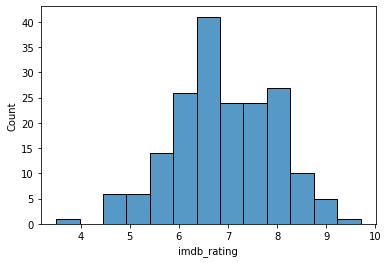

In [28]:
sns.histplot(df.imdb_rating)

Based on the results, most shows have a metascore of 60 and above.  IMDB ratings are 6 and higher.

## VI. Act
Based on the analysis, there are recommendations for the studio's success with their series "Space Pens".

- It is a good idea for the series season length to be 10 episodes and be targeted for a young audience.  
- Based on trends observed from the data, each episode has to be 30 minutes.
- Prior to adding the series onto Disney +, critics need to screen it and judging by critics' scores, a rating of 6 and up needs to be met.
- Finally the best month to release this series is in November in order to build some momentum for viewership during the holiday season.

With these recommendations and with the help of marketing and merchandising, the sky is the limit for the success of "Space Pens".